## Hello, I am Daniel. This is my EDA on the toxicity dataset for AIAP 15 DSP Mini Project 

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

from pprint import pprint

In [33]:
warnings.filterwarnings('ignore')

In [34]:
# Read csv file
df = pd.read_csv("../data/combined_jigsaw_comments.csv")

In [35]:
# Print full view of data
pd.set_option('display.max_columns', None)
df.head(15)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count,toxic,severe_toxic,identity_hate,lang
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21.0,NaN,317120.0,approved,0.0,0.0,0.0,2.0,0.0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,67.0,NaN,NaN,NaN,NaN
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21.0,NaN,154086.0,approved,0.0,0.0,1.0,2.0,0.0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,76.0,NaN,NaN,NaN,NaN
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55.0,NaN,374342.0,approved,1.0,0.0,2.0,3.0,7.0,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,63.0,NaN,NaN,NaN,NaN
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13.0,NaN,149218.0,approved,0.0,0.0,0.0,0.0,0.0,0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,76.0,NaN,NaN,NaN,NaN
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21.0,NaN,344096.0,approved,0.0,0.0,0.0,1.0,0.0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,80.0,NaN,NaN,NaN,NaN
5,6290444,"Cry me a river, why don't you.\nDrinking, drug...",train,2017-11-04 22:04:11.596185+00,54.0,6290143.0,396946.0,rejected,0.0,0.0,0.0,0.0,0.0,0.203390,0.016949,0.050847,0.000000,0.033898,0.203390,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59.0,NaN,NaN,NaN,NaN
6,5764010,I really wish the DP would bounce people tryin...,train,2017-08-14 09:02:12.901217+00,102.0,NaN,366182.0,approved,0.0,0.0,0.0,2.0,2.0,0.525000,0.012500,0.037500,0.000000,0.100000,0.462500,0.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,80.0,NaN,NaN,NaN,NaN
7,5730298,That is Child Abuse!!!,train,2017-08-08 09:30:14.543641+00,55.0,NaN,364090.0,approved,0.0,0.0,0.0,1.0,0.0,0.192982,0.000000,0.000000,0.105263,0.000000,0.035088,0.070175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,57.0,NaN,NaN,NaN,NaN
8,5167187,That's right. They are not normal. And I am st...,train,2017-04-23 05:37:53.975562+00,21.0,5166939.0,328935.0,rejected,0.0,0.0,0.0,0.0,0.0,0.803279,0.065574,0.049180,0.081967,0.131148,0.754098,0.016393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.0,NaN,NaN,NaN,NaN
9,5263240,Only a fool would believe that the MSM is not ...,train,2017-05-16 17:18:20.664499+00,54.0,5262909.0,334963.0,approved,2.0,0.0,1.0,3.0,5.0,0.710526,0.013158,0.065789,0.000000,0.013158,0.657895,0.013158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,76.0,NaN,NaN,NaN,NaN


In [36]:
# Check rows for missing data
df.isnull().sum()

id                                           0
comment_text                                 4
split                                   376539
created_date                            376539
publication_id                          376539
parent_id                              1241346
article_id                              376539
rating                                  376539
funny                                   376539
wow                                     376539
sad                                     376539
likes                                   376539
disagree                                376539
toxicity                                376539
severe_toxicity                         376539
obscene                                 152990
sexual_explicit                         376539
identity_attack                         376539
insult                                  152990
threat                                  152990
male                                   1928055
female       

In [37]:
print(df.columns)

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count', 'toxic', 'severe_toxic', 'identity_hate',
       'lang'],
      dtype='object')


In [38]:
# inspect unique vals of columns
for col in df.columns:
    print(col, df[col].unique())

id [1083994 650904 5902188 ... 63809 63810 63811]
comment_text ["He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed."
 'Mad dog will surely put the liberals in mental hospitals. Boorah'
 'And Trump continues his lifelong cowardice by not making this announcement himself.\n\nWhat an awful human being .....'
 ...
 'innnazitutto ti ringrazio per i ringraziamenti!! ) è una della mie band preferite... allora... io credo fermamente che il fatto di cambiare nome non  crei  una nuova band.... gli europe sono i force e sono i WC...sarebbe assurdo considerarle 3 band diverse secondo me... quindi la data di fondazione è 1978... no? esempio idiota: se vado all anagrafe e mi faccio cambiare il nome, sono sempre io no?? ;-) dimmi che ne pensi Thejoker'
 ' Kaç olumlu oy gerekiyor? Şu an 7 oldu.  Hayırlı olsun . ►   Cekli829    '
 ' Te pido disculpas. La verdad es qu

In [39]:
# print out comments for each lang
for lang in df.lang.unique():
    print(lang, df[df.lang == lang].comment_text, '\n')
    
# print out comments only nan
print(df[df.lang.isna()].comment_text)

nan Series([], Name: comment_text, dtype: object) 

tr 2312251    Doctor Who adlı viki başlığına 12. doctor olar...
2312254    Malesef gerçekleştirilmedi ancak şöyle bir şey...
2312255    :Resim:Seldabagcan.jpg resminde kaynak sorunu ...
2312261    Merhaba. Düzelttiğin için teşekkürler. İngiliz...
2312268    Merhaba Abuk Sabuk, Ankara (şehir) maddesiyle ...
                                 ...                        
2376024        dünyayı güzellik kurtaracak, bir insanı se...
2376034    Önemli değil. postyorum  Tam bilgi kutusu ekle...
2376045    Ckallogo.jpg lisans sorunu 64px|left|Dosya tel...
2376049    Evet haklısın telifli etiketi koymuşsun demişi...
2376053     Kaç olumlu oy gerekiyor? Şu an 7 oldu.  Hayır...
Name: comment_text, Length: 13998, dtype: object 

ru 2312252     Вполне возможно, но я пока не вижу необходимо...
2312269    , под вашу ответственность. NB: ЭСБЕ, значит, ...
2312271     Ошибаетесь Вы. Во-первых, текст должен быть п...
2312277    Отличная работа, спасибо. 

### Finding: Lang 'NaN' is english, drop the rest?

In [40]:
# Set all NaN language to english
df.lang = df.lang.fillna('en')

# print out unique vals of lang
print(df.lang.unique())

['en' 'tr' 'ru' 'it' 'fr' 'pt' 'es']


In [41]:
# drop all rows with lang not 'en'
df = df[df.lang == 'en']

print(df.lang.unique())

['en']


In [42]:
# Preliminary drop of columns
df.drop(columns=['id', 
              #    'comment_text', 'split', 
                 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 
      #  'funny', 'wow', 'sad', 'likes','disagree', 
      #  'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
      #  'identity_attack', 'insult', 'threat', 
       'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count', 'toxic', 'severe_toxic', 'identity_hate',
       'lang'], inplace=True)

In [43]:
df.head()

,comment_text,split,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,He got his money... now he lies in wait till a...,train,0.0,0.0,0.0,2.0,0.0,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925
1,Mad dog will surely put the liberals in mental...,train,0.0,0.0,1.0,2.0,0.0,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789
2,And Trump continues his lifelong cowardice by ...,train,1.0,0.0,2.0,3.0,7.0,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000
3,"""while arresting a man for resisting arrest"".\...",test,0.0,0.0,0.0,0.0,0.0,0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263
4,Tucker and Paul are both total bad ass mofo's.,train,0.0,0.0,0.0,1.0,0.0,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000


In [44]:
# df describe
df.describe()

,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
count,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,1.999516e+06,2.223065e+06,1.999516e+06,1.999516e+06,2.223065e+06,2.223065e+06
mean,2.776687e-01,4.437174e-02,1.089289e-01,2.441188e+00,5.808151e-01,1.029241e-01,4.580563e-03,1.795457e-02,6.562431e-03,2.254899e-02,7.806368e-02,8.657584e-03
std,1.054819e+00,2.458644e-01,4.555570e-01,4.712994e+00,1.854332e+00,1.970386e-01,2.285760e-02,9.525246e-02,4.511177e-02,7.854022e-02,1.811210e-01,5.001892e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Finding: 
From quick visual inspection, it looks like the columns:
* funny
* wow
* sad
* likes
* disagree

Are counts of user interactions. (Might not need to keep? We don't need this for our sentiment analysis)

In [45]:
df.drop(columns=['funny', 'wow', 'sad', 'likes', 'disagree'], inplace=True)

In [46]:
df.columns

Index(['comment_text', 'split', 'toxicity', 'severe_toxicity', 'obscene',
       'sexual_explicit', 'identity_attack', 'insult', 'threat'],
      dtype='object')

In [47]:
# count missing vals for each column
df.isnull().sum()

comment_text            4
split              312735
toxicity           312735
severe_toxicity    312735
obscene             89186
sexual_explicit    312735
identity_attack    312735
insult              89186
threat              89186
dtype: int64

In [48]:
# drop rows with missing values
df_dropped = df.dropna()

In [49]:
print(df_dropped.isnull().sum())

print(df_dropped.shape)

comment_text       0
split              0
toxicity           0
severe_toxicity    0
obscene            0
sexual_explicit    0
identity_attack    0
insult             0
threat             0
dtype: int64
(1999512, 9)


array([[<Axes: title={'center': 'toxicity'}>,
        <Axes: title={'center': 'severe_toxicity'}>,
        <Axes: title={'center': 'obscene'}>],
       [<Axes: title={'center': 'sexual_explicit'}>,
        <Axes: title={'center': 'identity_attack'}>,
        <Axes: title={'center': 'insult'}>],
       [<Axes: title={'center': 'threat'}>, <Axes: >, <Axes: >]],
      dtype=object)

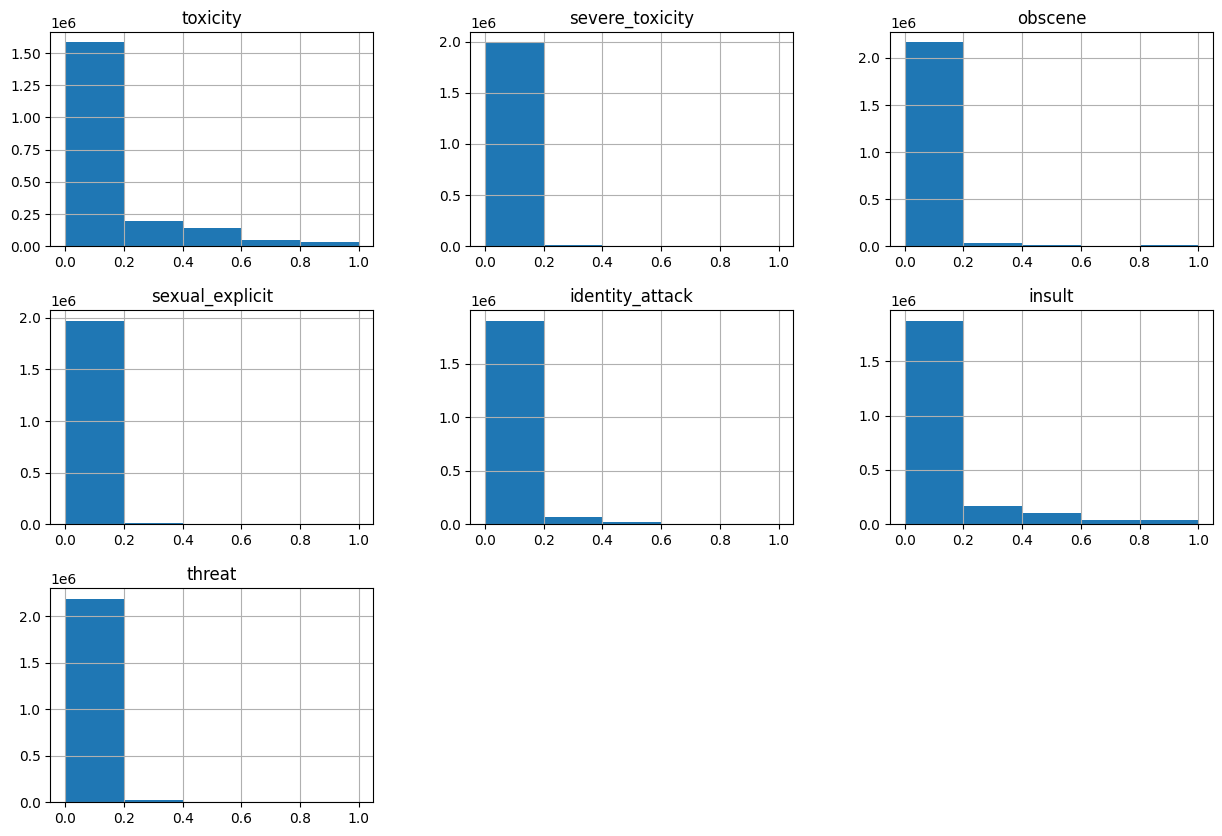

In [50]:
df.hist(figsize=(15,10), bins=5)

#### Print out examples of each level of toxicity / rudeness

In [51]:
levels = [0, 0.4, 0.8, 1]

num_cols = df.select_dtypes(include=['number']).columns

for col in df[num_cols]:
    print(col)
    if not df_dropped.empty:
        print(f'Level = {levels[0]} to {levels[1]}')
        if not df_dropped[(df_dropped[col] > levels[0]) & (df_dropped[col] < levels[1])].empty:
            print(df_dropped[(df_dropped[col] > levels[0]) & (df_dropped[col] < levels[1])].comment_text.sample(1), '\n')
        else:
            print("No entries within this level range.\n")
        
        print(f'Level = {levels[1]} to {levels[2]}')
        if not df_dropped[(df_dropped[col] > levels[1]) & (df_dropped[col] < levels[2])].empty:
            print(df_dropped[(df_dropped[col] > levels[1]) & (df_dropped[col] < levels[2])].comment_text.sample(1), '\n')
        else:
            print("No entries within this level range.\n")
        
        print(f'Level = {levels[2]} to {levels[3]}')
        if not df_dropped[(df_dropped[col] > levels[2]) & (df_dropped[col] < levels[3])].empty:
            print(df_dropped[(df_dropped[col] > levels[2]) & (df_dropped[col] < levels[3])].comment_text.sample(1), '\n')
        else:
            print("No entries within this level range.\n")
    else:
        print("DataFrame is empty.\n")


toxicity
Level = 0 to 0.4
1639893    Counter-scenario... let's say everyone has the...
Name: comment_text, dtype: object 

Level = 0.4 to 0.8
1820628    Postmedia has done serious damage to Canadian ...
Name: comment_text, dtype: object 

Level = 0.8 to 1
597921    Your an idiot for saying something so disrespe...
Name: comment_text, dtype: object 

severe_toxicity
Level = 0 to 0.4
531911    Historic Denver is the same group of fools tha...
Name: comment_text, dtype: object 

Level = 0.4 to 0.8
207189    You are murdering feckless SCUM.  Your mother ...
Name: comment_text, dtype: object 

Level = 0.8 to 1
No entries within this level range.

obscene
Level = 0 to 0.4
1915244    I think there is a very good chance that Clint...
Name: comment_text, dtype: object 

Level = 0.4 to 0.8
200810    Holy shit. Is Trump really pushing Bannon unde...
Name: comment_text, dtype: object 

Level = 0.8 to 1
530322    Then the Anchorage assembly should come up wit...
Name: comment_text, dtype: object 



In [52]:
levels = [0, 0.4, 0.8, 1]

num_cols = df.select_dtypes(include=['number']).columns

for col in df[num_cols]:
    print(col)
    if not df_dropped.empty:
        print(f'Level = {levels[0]} to {levels[1]}')
        if not df_dropped[(df_dropped[col] > levels[0]) & (df_dropped[col] < levels[1])].empty:
            sample_row = random.choice(df_dropped[(df_dropped[col] > levels[0]) & (df_dropped[col] < levels[1])].index)
            print(df_dropped.loc[sample_row, 'comment_text'], '\n')
        else:
            print("No entries within this level range.\n")
        
        print(f'Level = {levels[1]} to {levels[2]}')
        if not df_dropped[(df_dropped[col] > levels[1]) & (df_dropped[col] < levels[2])].empty:
            sample_row = random.choice(df_dropped[(df_dropped[col] > levels[1]) & (df_dropped[col] < levels[2])].index)
            print(df_dropped.loc[sample_row, 'comment_text'], '\n')
        else:
            print("No entries within this level range.\n")
        
        print(f'Level = {levels[2]} to {levels[3]}')
        if not df_dropped[(df_dropped[col] > levels[2]) & (df_dropped[col] < levels[3])].empty:
            sample_row = random.choice(df_dropped[(df_dropped[col] > levels[2]) & (df_dropped[col] < levels[3])].index)
            print(df_dropped.loc[sample_row, 'comment_text'], '\n')
        else:
            print("No entries within this level range.\n")
    else:
        print("DataFrame is empty.\n")


toxicity
Level = 0 to 0.4
All these players forget how many black people fought and died for this country and they are disrespecting them as well as everyone else....white, latino, asian, etc. who fought and died. 

Level = 0.4 to 0.8
You son is part of a useless mission wasting Canadian resources 

Level = 0.8 to 1
Windbag! 

severe_toxicity
Level = 0 to 0.4
You gotta hit the Americans where it hurts. 

Level = 0.4 to 0.8
Kill all the nigggers and pedophiles! 

Level = 0.8 to 1
No entries within this level range.

obscene
Level = 0 to 0.4
Trump is a racist and a misogynist. He also has the temperament and intellect of a five year old insecure brat. I will never call him president. 

Level = 0.4 to 0.8
So the west coast Hong Kong fiefdom is experiencing a little cool weather....too bad....so sad....suck it up Chinavouver! 

Level = 0.8 to 1
Just think of the 1300 Superfund cleanup sites! Us American's sure know how to pollute the crap out of our planet. 

sexual_explicit
Level = 0 to 0

### Finding:
We have different kinds of "toxicity".